
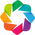

In [1]:
import holoviews as hv
import matplotlib.pyplot as plt
import numpy as np
from swktools.plotting import plot3d
import swktools.TakensEmbed as te
from scipy.integrate import odeint

hv.extension('bokeh', 'matplotlib')

Model system

In [2]:
def run_model(Bxy, Byx, rx, ry, x0, y0, N):
    x = np.zeros(N)
    y = np.zeros(N)
    x[0], y[0] = x0, y0
    for i in range(1,N):
        x[i] = x[i-1]*(rx-rx*x[i-1]-Bxy*y[i-1])
        y[i] = y[i-1]*(ry-ry*y[i-1]-Byx*x[i-1])
    return x,y

In [32]:
%%opts Curve {+axiswise} Curve.time [width=900]
Bxy = 0.02
Byx = 0.2
rx = 3.8
ry = 3.5
x0 = 0.4
y0 = 0.2
N = 3000
x,y = run_model(Bxy, Byx, rx, ry, x0, y0, N)
data = np.array([x,y]).T
fig = hv.Curve(zip(x, y))*hv.Scatter(zip(x, y))+hv.Curve(x, group='time')*hv.Curve(y, group='time')
fig.cols(1)

:Layout
   .Overlay.I :Overlay
      .Curve.I   :Curve   [x]   (y)
      .Scatter.I :Scatter   [x]   (y)
   .Time.I    :Overlay
      .Time.I  :Curve   [x]   (y)
      .Time.II :Curve   [x]   (y)

Get delay manifolds

In [33]:
tau = 1
ndelay = 3
delay_man = te.get_delayed_manifold(data, tau, ndelay)

<IPython.core.display.Javascript object>


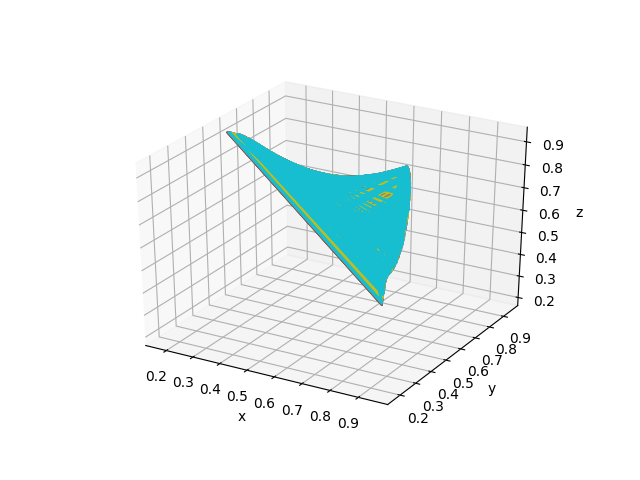

In [34]:
%matplotlib nbagg
plot3d(delay_man[0,:], ntraj=10)

In [81]:
%matplotlib inline

Do embedding

In [39]:
rnge = range(10, 3000, 40)
cors = te.do_embedding(delay_man, rnge, timesampling='random')

In [40]:
hv.Curve(cors[0,1], label='x->y')*hv.Curve(cors[1,0], label='y->x')

:Overlay
   .Curve.X_hyphen_minus_greater_than_y :Curve   [x]   (y)
   .Curve.Y_hyphen_minus_greater_than_x :Curve   [x]   (y)

Do above for Lorentz attractor

In [18]:
sigma = 10
rho = 28
beta = 8.0/3
theta = 3 * np.pi / 4

def lorenz(xyz, t):
    x, y, z = xyz
    x_dot = sigma * (y - x)
    y_dot = x * rho - x * z - y
    z_dot = x * y - beta* z
    return [x_dot, y_dot, z_dot]

initial = (-10, -7, 35)
t = np.arange(0, 100, 0.006)

solution = odeint(lorenz, initial, t)

x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]

xprime = np.cos(theta) * x - np.sin(theta) * y

lorenzian = hv.Overlay([hv.Path(d) for d in zip(np.array_split(xprime, 7), np.array_split(z, 7))])


<IPython.core.display.Javascript object>


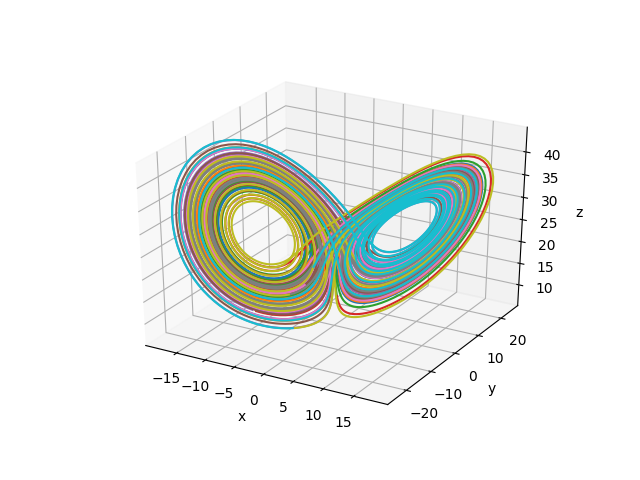

In [19]:
%matplotlib nbagg
plot3d(solution, ntraj=10)

Get delay manifolds

In [20]:
tau = 10
ndelay = 3
delay_man = te.get_delayed_manifold(solution, tau, ndelay)

<IPython.core.display.Javascript object>


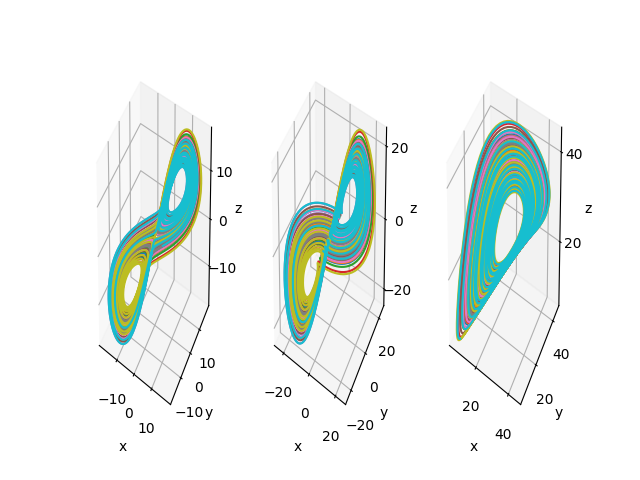

In [21]:
%matplotlib nbagg
ntraj = 10
fig = plt.figure()
ax = fig.add_subplot(131, projection='3d')
plot3d(delay_man[0,:], ntraj=ntraj, ax=ax)
ax = fig.add_subplot(132, projection='3d')
plot3d(delay_man[1,:], ntraj=ntraj, ax=ax)
ax = fig.add_subplot(133, projection='3d')
plot3d(delay_man[2,:], ntraj=ntraj, ax=ax)


Do embedding

In [26]:
rnge = range(40, 3000, 40)
cors = te.do_embedding(delay_man, rnge, timesampling='random')

In [27]:
fig = hv.Curve(cors[0,1], label='x->y')*hv.Curve(cors[1,0], label='y->x')
fig+= hv.Curve(cors[0,2], label='x->z')*hv.Curve(cors[2,0], label='z->x')
fig+= hv.Curve(cors[1,2], label='y->z')*hv.Curve(cors[2,1], label='z->y')
fig

:Layout
   .Overlay.I   :Overlay
      .Curve.X_hyphen_minus_greater_than_y :Curve   [x]   (y)
      .Curve.Y_hyphen_minus_greater_than_x :Curve   [x]   (y)
   .Overlay.II  :Overlay
      .Curve.X_hyphen_minus_greater_than_z :Curve   [x]   (y)
      .Curve.Z_hyphen_minus_greater_than_x :Curve   [x]   (y)
   .Overlay.III :Overlay
      .Curve.Y_hyphen_minus_greater_than_z :Curve   [x]   (y)
      .Curve.Z_hyphen_minus_greater_than_y :Curve   [x]   (y)